In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

X shape: torch.Size([100, 2])
y shape: torch.Size([100, 2])
torch.Size([100, 2]) torch.Size([100, 2])


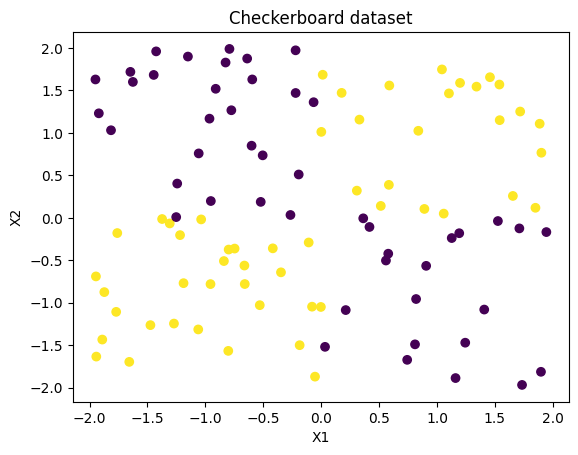

In [2]:
def create_checkerboard():
    X = 4 * torch.rand((100, 2)) - 2

    y = torch.zeros((100, 2))


    for i in range(100):
        if X[i, 0] * X[i, 1] > 0:
            y[i] = torch.tensor([1, 0])
        else:
            y[i] = torch.tensor([0, 1])

    print('X shape:', X.shape)
    print('y shape:', y.shape)

    return X, y


X, y = create_checkerboard()

print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y[:,0])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Checkerboard dataset")
plt.show()

In [3]:
from IPython.display import clear_output

def visualize(epoch, data, model, losses):
    X, y = data
    # Creates a 2d grid
    xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 100), np.linspace(-2.5, 2.5, 100))

    # Uses the model to predict the class
    grid_tensor = torch.FloatTensor(np.stack([xx.ravel(), yy.ravel()], axis=1))
    with torch.no_grad():
        Z = model(grid_tensor)
        Z = Z[:,0] - Z[:,1]

    # Reshapes the predictions to fit the grid
    Z = Z.reshape(xx.shape)

    # Plots the output of the neural network
    fig = plt.figure(1, figsize=(10, 4))
    plt.subplot(1,2,1)
    CS = plt.contourf(xx, yy, Z, alpha=0.8)
    fig.colorbar(CS)
    plt.scatter(X[:, 0], X[:, 1], c=y[:,0])
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Classification with an MLP (epoch = {epoch})")

    # Plots the loss function
    plt.subplot(1,2,2)
    plt.plot(losses)
    plt.ylim([0,1])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs. number of epochs")
    plt.tight_layout()
    clear_output()
    plt.show()

In [5]:
#linear model with relu as activation function (100 hidden states)
model = nn.Sequential(
    nn.Linear(2,100),
    nn.ReLU(),
    nn.Linear(100,2)
)

X,y = create_checkerboard()

with torch.no_grad():
    outputs = model(X)
    print(outputs.shape)

X shape: torch.Size([100, 2])
y shape: torch.Size([100, 2])
torch.Size([100, 2])


In [10]:
def train(data, model, n_epochs):
  X,y = data
  learning_rate = 1e-2
  losses = []
  for epoch in range(1,n_epochs + 1):
    model.zero_grad()

    outputs = model(X)

    loss = ((outputs-y)**2).mean() #mean square error

    loss.backward()

    with torch.no_grad():
      for p in model.parameters():
        p -= learning_rate * p.grad

    losses.append(loss.item())

    if epoch%100 == 0:
      visualize(epoch, data, model, losses)


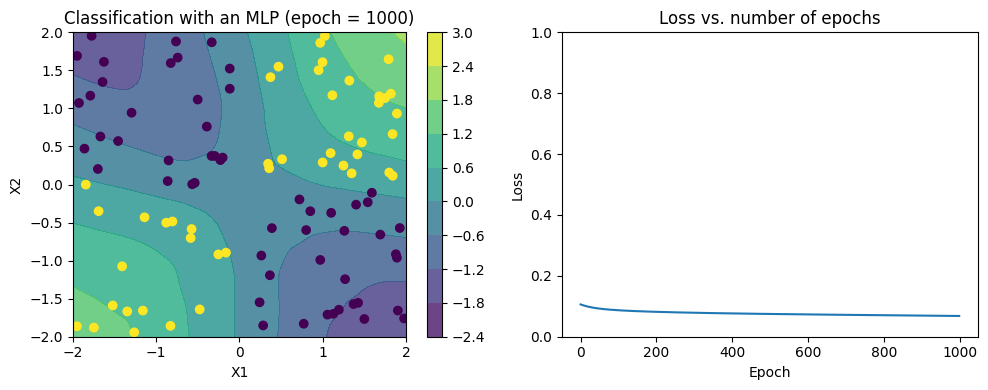

In [11]:
X,y = create_checkerboard()

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train((X,y), model, 1000)

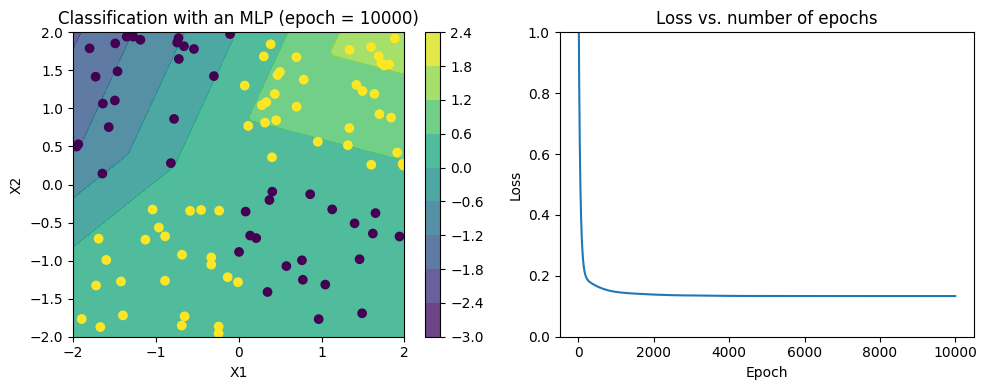

In [13]:
#less complex model with less number of hidden states
model1 = nn.Sequential(
    nn.Linear(2,2),
    nn.ReLU(),
    nn.Linear(2,2)
)

X,y = create_checkerboard()

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train((X,y), model1, 10000) #In this case the model does not learn to classify well not even with a big number of epochs

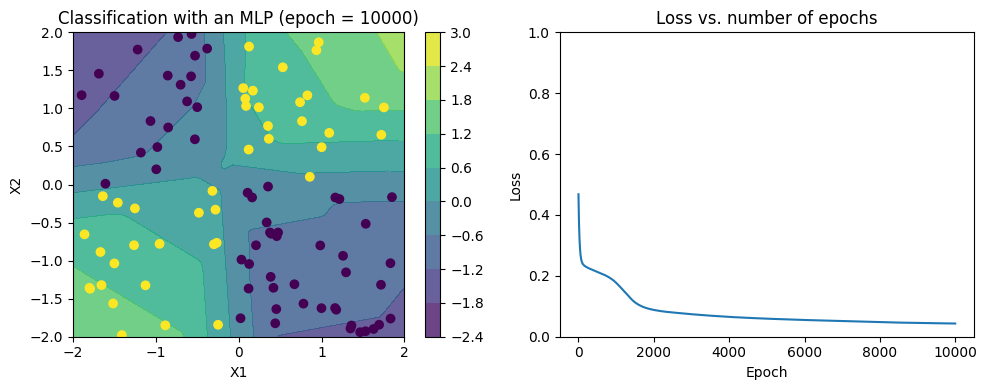

In [15]:
#Same model but with 10 hidden states
model2 = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,2)
)

X,y = create_checkerboard()

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train((X,y), model2, 10000)

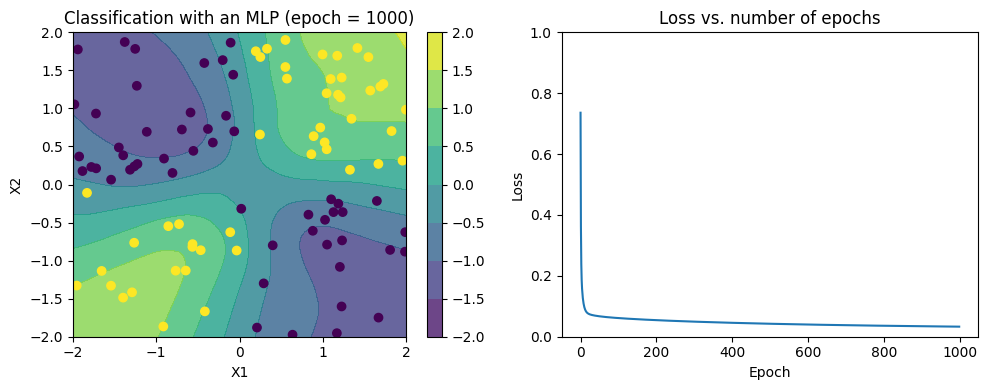

In [17]:
#same model but now with 1000 hidden states (big number!!)
model3 = nn.Sequential(
    nn.Linear(2,1000),
    nn.ReLU(),
    nn.Linear(1000,2)
)

X,y = create_checkerboard()

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train((X,y), model3, 1000)